### Importación de datos



In [42]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
ingresos_totales = {
    "Tienda 1": tienda["Precio"].sum(),
    "Tienda 2": tienda2["Precio"].sum(),
    "Tienda 3": tienda3["Precio"].sum(),
    "Tienda 4": tienda4["Precio"].sum()
}

for tienda, ingreso in ingresos_totales.items():
  print((f"Ingreso total de {tienda}: {ingreso}"))

Ingreso total de Tienda 1: 1150880400.0
Ingreso total de Tienda 2: 1116343500.0
Ingreso total de Tienda 3: 1098019600.0
Ingreso total de Tienda 4: 1038375700.0


# 2. Ventas por categoría

In [ ]:
ventas_por_categoria= {
  "tienda_1" : tienda.groupby('Categoría del Producto')['Precio'].sum(),
  "tienda_2" : tienda2.groupby('Categoría del Producto')['Precio'].sum(),
  "tienda_3" : tienda3.groupby('Categoría del Producto')['Precio'].sum(),
  "tienda_4" : tienda4.groupby('Categoría del Producto')['Precio'].sum()
}

In [ ]:
for tienda, ventas in ventas_por_categoria.items():
  print(f"Ventas por categoría en {tienda}:")
  ventas_df = ventas.to_frame().reset_index()
  ventas_df.columns = ['Categoría del Producto', 'Precio']
  ventas_df = ventas_df.sort_values(by=['Precio'], ascending=False)
  print(ventas_df.to_string(index=False))
  print("\n")

# 3. Calificación promedio de la tienda


In [ ]:
calificacion_promedio = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}


In [ ]:
for tienda, calificacion in calificacion_promedio.items():
    print(f"Calificación promedio de {tienda}: {calificacion}")

Calificación promedio de Tienda 1: 3.976685036032217
Calificación promedio de Tienda 2: 4.037303942348453
Calificación promedio de Tienda 3: 4.048325561678677
Calificación promedio de Tienda 4: 3.9957591178965224


# 4. Productos más y menos vendidos

In [ ]:
producto_mas_vendido = {
    "Tienda 1": tienda.groupby('Producto').size().idxmax(),
    "Tienda 2": tienda2.groupby('Producto').size().idxmax(),
    "Tienda 3": tienda3.groupby('Producto').size().idxmax(),
    "Tienda 4": tienda4.groupby('Producto').size().idxmax()
    }

producto_menos_vendido = {
    "Tienda 1": tienda.groupby('Producto').size().idxmin(),
    "Tienda 2": tienda2.groupby('Producto').size().idxmin(),
    "Tienda 3": tienda3.groupby('Producto').size().idxmin(),
    "Tienda 4": tienda4.groupby('Producto').size().idxmin()
    }



In [ ]:
for tienda, producto in producto_mas_vendido.items():
    print(f"Producto más vendido en {tienda}: {producto}")
    print()

for tienda, producto in producto_menos_vendido.items():
    print(f"Producto menos vendido en {tienda}: {producto}")
    print()

# 5. Envío promedio por tienda

In [ ]:
envio_promedio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

for tienda, envio in envio_promedio.items():
    print(f"Costo de envío promedio de {tienda}: {envio:.2f}")

Costo de envío promedio de Tienda 1: 26018.61
Costo de envío promedio de Tienda 2: 25216.24
Costo de envío promedio de Tienda 3: 24805.68
Costo de envío promedio de Tienda 4: 23459.46


#**GRAFICOS**

## **GRAFICO DE INGRESOS TOTALES POR TIENDA.**

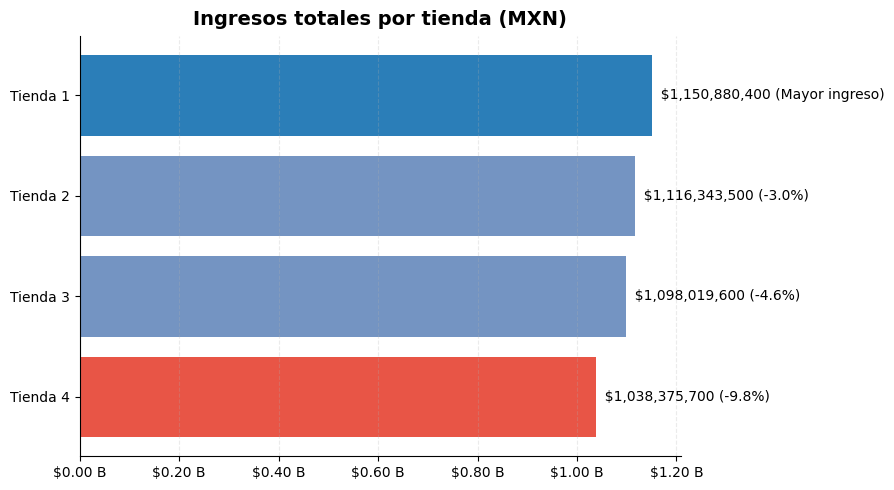

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

ingresos_df = pd.DataFrame(list(ingresos_totales.items()), columns=["Tienda", "Ingresos"])
ingresos_df = ingresos_df.sort_values("Ingresos", ascending=True).reset_index(drop=True)

max_val = ingresos_df["Ingresos"].max()
min_val = ingresos_df["Ingresos"].min()

def pick_color(v):
    if v == max_val:   # líder
        return "#1f77b4"   # azul
    elif v == min_val: # peor
        return "#e74c3c"   # rojo
    else:
        return "#6c8ebf"   # gris azulado

colors = [pick_color(v) for v in ingresos_df["Ingresos"]]

fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(ingresos_df["Tienda"], ingresos_df["Ingresos"], color=colors, alpha=0.95)

# Título
ax.set_title("Ingresos totales por tienda (MXN)", fontsize=14, weight="bold", pad=8)

# Eje X en miles de millones
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"${x/1e9:.2f} B"))
ax.grid(axis="x", linestyle="--", alpha=0.25)
ax.set_xlabel("")
ax.set_ylabel("")

# Quitamos los bordes superiores y derechos
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


for i, (tienda, val) in enumerate(zip(ingresos_df["Tienda"], ingresos_df["Ingresos"])):
    delta_pct = (val / max_val - 1) * 100
    etiqueta_valor = f"${val:,.0f}"
    etiqueta_delta = " (Mayor ingreso)" if val == max_val else f" ({delta_pct:+.1f}%)"
    ax.text(val, i, f"  {etiqueta_valor}{etiqueta_delta}",
            va="center", ha="left", fontsize=10)

plt.tight_layout()
plt.show()

##**GRAFICO DE CALIFICACIÓN PROMEDIO POR TIENDA.**

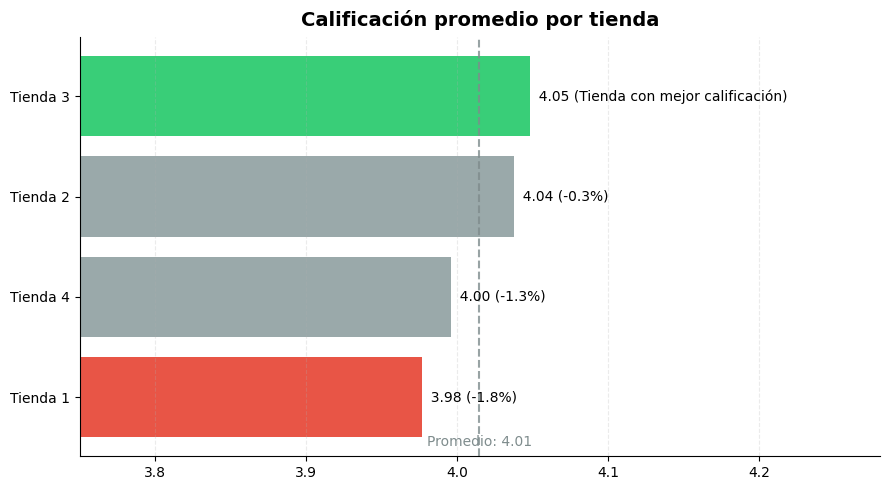

In [ ]:
from matplotlib.ticker import MultipleLocator

calificacion_promedio = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

# 2) DataFrame ordenado
calif_df = pd.DataFrame(list(calificacion_promedio.items()), columns=["Tienda", "Calificación"])
calif_df = calif_df.sort_values("Calificación", ascending=True).reset_index(drop=True)

best = calif_df["Calificación"].max()
worst = calif_df["Calificación"].min()
avg = calif_df["Calificación"].mean()

def color_for(v):
    if v == best:  return "#2ecc71"  # verde (mejor)
    if v == worst: return "#e74c3c"  # rojo (peor)
    return "#95a5a6"                 # gris para intermedias

colors = [color_for(v) for v in calif_df["Calificación"]]

# 3) Rango X: zoom suave en torno a min–max, respetando 0..5
pad = 0.08
x_min = max(0, round(worst - pad, 2))
x_max = min(5, round(best + pad, 2))
if x_max - x_min < 0.3:  # si la banda queda muy fina, ampliamos un poco
    extra = 0.15
    x_min = max(0, x_min - extra)
    x_max = min(5, x_max + extra)

# 4) Gráfico
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(calif_df["Tienda"], calif_df["Calificación"], color=colors, alpha=0.95)

# Título
ax.set_title("Calificación promedio por tienda", fontsize=14, weight="bold", pad=8)

# Eje X: límites y grilla ligera
ax.set_xlim(x_min, x_max)
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.grid(axis="x", linestyle="--", alpha=0.25)

# Quitar bordes superiores y derechos
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Línea de promedio general
ax.axvline(avg, color="#7f8c8d", linestyle="--", linewidth=1.5, alpha=0.8)
ax.text(avg, -0.45, f"Promedio: {avg:.2f}", ha="center", va="center", fontsize=10, color="#7f8c8d")

# Anotaciones: valor + delta vs. la mejor
for y, (tienda_n, val) in enumerate(zip(calif_df["Tienda"], calif_df["Calificación"])):
    delta_pct = (val / best - 1) * 100
    etiqueta = f"{val:.2f} ({delta_pct:+.1f}%)" if val != best else f"{val:.2f} (Tienda con mejor calificación)"
    ax.text(val, y, "  " + etiqueta, va="center", ha="left", fontsize=10)

ax.set_xlabel("")
ax.set_ylabel("")

plt.tight_layout()
plt.show()

## **GRAFICO COSTO DE ENVÍO PROMEDIO POR TIENDA**

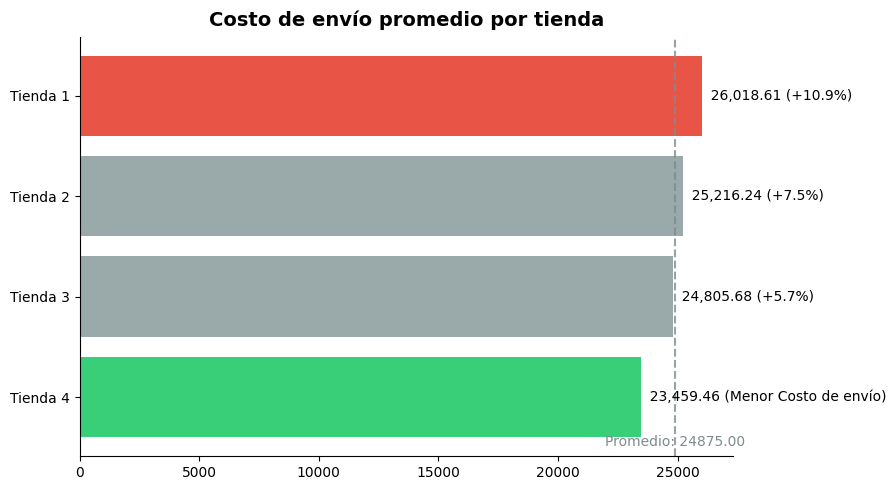

In [43]:
# 1) Partimos del diccionario que ya calculaste
envio_promedio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

# 2) Convertir a DataFrame y ordenar
envio_df = pd.DataFrame(list(envio_promedio.items()), columns=["Tienda", "Costo de envío"])
envio_df = envio_df.sort_values("Costo de envío", ascending=True).reset_index(drop=True)

best = envio_df["Costo de envío"].min()   # más eficiente
worst = envio_df["Costo de envío"].max()  # menos eficiente
avg = envio_df["Costo de envío"].mean()

def color_for(v):
    if v == best:  return "#2ecc71"  # verde (mejor)
    if v == worst: return "#e74c3c"  # rojo (peor)
    return "#95a5a6"                 # gris para intermedias

colors = [color_for(v) for v in envio_df["Costo de envío"]]

# 3) Gráfico
fig, ax = plt.subplots(figsize=(9,5))
ax.barh(envio_df["Tienda"], envio_df["Costo de envío"], color=colors, alpha=0.95)

# Título
ax.set_title("Costo de envío promedio por tienda", fontsize=14, weight="bold", pad=8)

# Línea de promedio
ax.axvline(avg, color="#7f8c8d", linestyle="--", linewidth=1.5, alpha=0.8)
ax.text(avg, -0.45, f"Promedio: {avg:.2f}", ha="center", va="center", fontsize=10, color="#7f8c8d")

# Quitar bordes superiores y derechos
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Etiquetas con valores + delta vs. más eficiente
for y, (tienda_n, val) in enumerate(zip(envio_df["Tienda"], envio_df["Costo de envío"])):
    delta_pct = (val / best - 1) * 100
    etiqueta = f"{val:,.2f} ({delta_pct:+.1f}%)" if val != best else f"{val:,.2f} (Menor Costo de envío)"
    ax.text(val, y, "  " + etiqueta, va="center", ha="left", fontsize=10)

ax.set_xlabel("")
ax.set_ylabel("")

plt.tight_layout()
plt.show()

# **CONCLUSIÓN FINAL ACERCA DE QUE TIENDA DEBE VENDER EL SR. JUAN**

Conclusion basándonos en el análisis de los datos de las cuatro tiendas, podemos ofrecer las siguientes observaciones para ayudar al Sr. Juan a decidir cual tienda debe vender:

**1. Ingresos Totales:**

*   La Tienda 1 tiene los ingresos totales más altos ($1,150,880,400).

*   La Tienda 4 tiene los ingresos totales más bajos ($ 1,038,375,700).

**2. Ventas por Categoría:**
*   En general, las categorías **"Electrónicos"** y **"Electrodomésticos"** son las que generan mayores ingresos en todas las tiendas.

*   Las categorías **"Libros"** y **"Artículos para el hogar"** tienden a tener las ventas más bajas.

**3. Calificación Promedio de los Clientes:**
*   La Tienda 3 tiene la calificación promedio más alta (4.05).

*   La Tienda 1 tiene la calificación promedio más baja (3.98).

**4. Productos Más y Menos Vendidos:**
*   Los productos más vendidos varían en cada tienda, destacando **"Armario"** en Tienda 1, **"Iniciando en programación"** en Tienda 2, **"Kit de bancas"** en Tienda 3 y **"Cama box"** en Tienda 4.

*   Los productos menos vendidos también son diversos en cada tienda.

**5. Costo de Envío Promedio:**
*   La Tienda 1 tiene el costo de envío promedio más alto ($26,018.61).

*   La Tienda 4 tiene el costo de envío promedio más bajo ($23,459.46).

**Recomendación para el Sr. Juan:**

Considerando los ingresos totales, la Tienda 1 es la que genera mayores ventas. Sin embargo, también tiene el costo de envío promedio más alto y la calificación promedio más baja con 3,98 (por debajo del promedio).

La Tienda 3, a pesar de tener ingresos totales ligeramente inferiores a la Tienda 1 y 2, destaca por tener la calificación promedio más alta, lo que sugiere una mayor satisfacción del cliente. Su costo de envío promedio es intermedio.

La Tienda 4 tiene los ingresos totales más bajos, el costo de envío promedio más bajo y su calificacion promedio tambien es baja con 4.00 (por debajo del promedio)

**La recomendación sería vender la Tienda 4, dado que combina el menor nivel de ingresos con una satisfacción del cliente que no compensa esa debilidad, aun considerando su bajo costo de envío. Las demás tiendas muestran un mayor potencial de crecimiento o rentabilidad**

La decisión final dependerá de las prioridades del Sr. Juan (maximizar ingresos, satisfacción del cliente, minimizar costos de envío, etc.) y de si está dispuesto a invertir en mejorar los puntos débiles de la tienda elegida.